In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

resultsdf = pd.read_csv('http://128.198.162.191/dataFiles/OLYMPICS/olympics_1896-2024.csv')


# Matplotlib Examples

In [3]:
resultsdf.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,EventType,Medal
0,2024,Paris,Cycling Road,Men Individual Time Trial,Evenepoel Remco,Belgium,Male,Athlete,Gold
1,2024,Paris,Cycling Road,Men Individual Time Trial,Ganna Filippo,Italy,Male,Athlete,Silver
2,2024,Paris,Cycling Road,Men Individual Time Trial,Van Aert Wout,Belgium,Male,Athlete,Bronze
3,2024,Paris,Cycling Road,Women Individual Time Trial,Brown Grace,Australia,Female,Athlete,Gold
4,2024,Paris,Cycling Road,Women Individual Time Trial,Henderson Anna,Great Britain,Female,Athlete,Silver


In [4]:
resultsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24012 entries, 0 to 24011
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        24012 non-null  int64 
 1   City        24012 non-null  object
 2   Sport       24012 non-null  object
 3   Discipline  24012 non-null  object
 4   Athlete     20388 non-null  object
 5   Country     24012 non-null  object
 6   Gender      24012 non-null  object
 7   EventType   24012 non-null  object
 8   Medal       24012 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


## Let's see the number of medals won by Country

In [5]:
medalsCountry = resultsdf.groupby('Country')['Medal'].count().sort_values(ascending=False)

medalsCountry

Country
United States of America    3424
Germany                     1280
Soviet Union                1272
Great Britain               1207
France                      1139
                            ... 
Paraguay                       1
Guyana                         1
Iraq                           1
Samoa                          1
Sudan                          1
Name: Medal, Length: 162, dtype: int64

## Visualize the answer

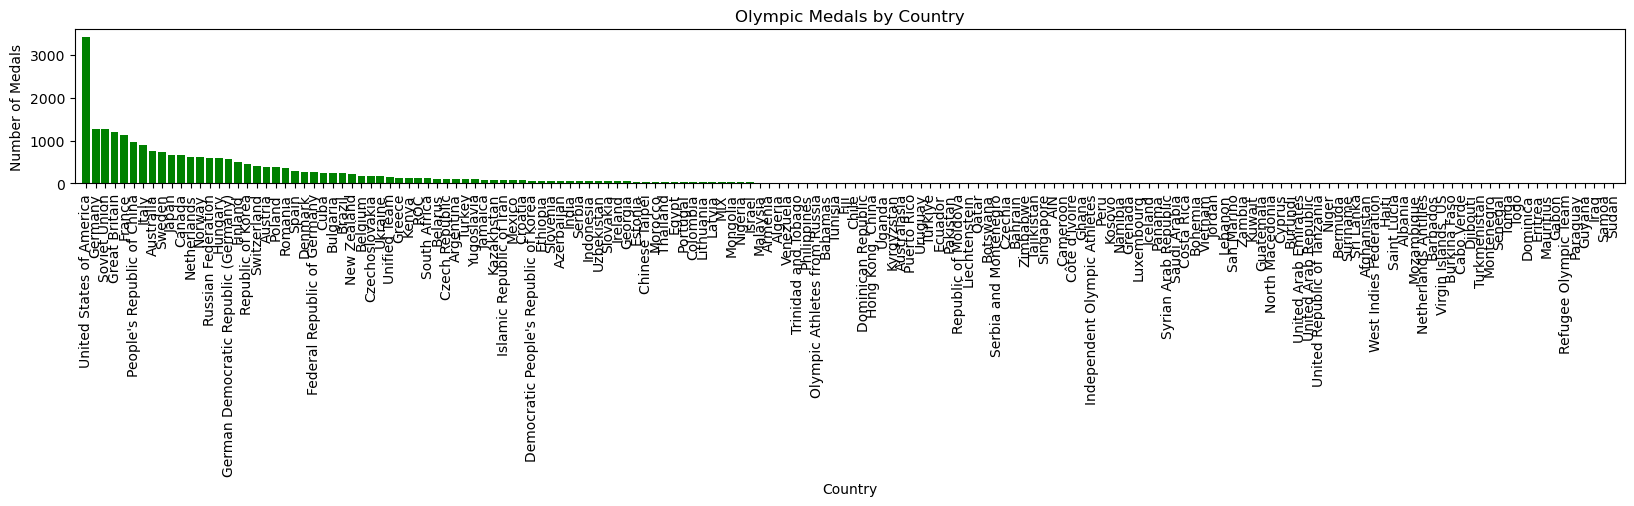

In [9]:
# Establish the visual
plt.figure(figsize=(20,2))

# Format a bar chart
# Choose the values that are going to populate the X and Y axis.
plt.bar(medalsCountry.index, medalsCountry.values, color='green')

plt.title('Olympic Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.margins(x=.005)

plt.show()

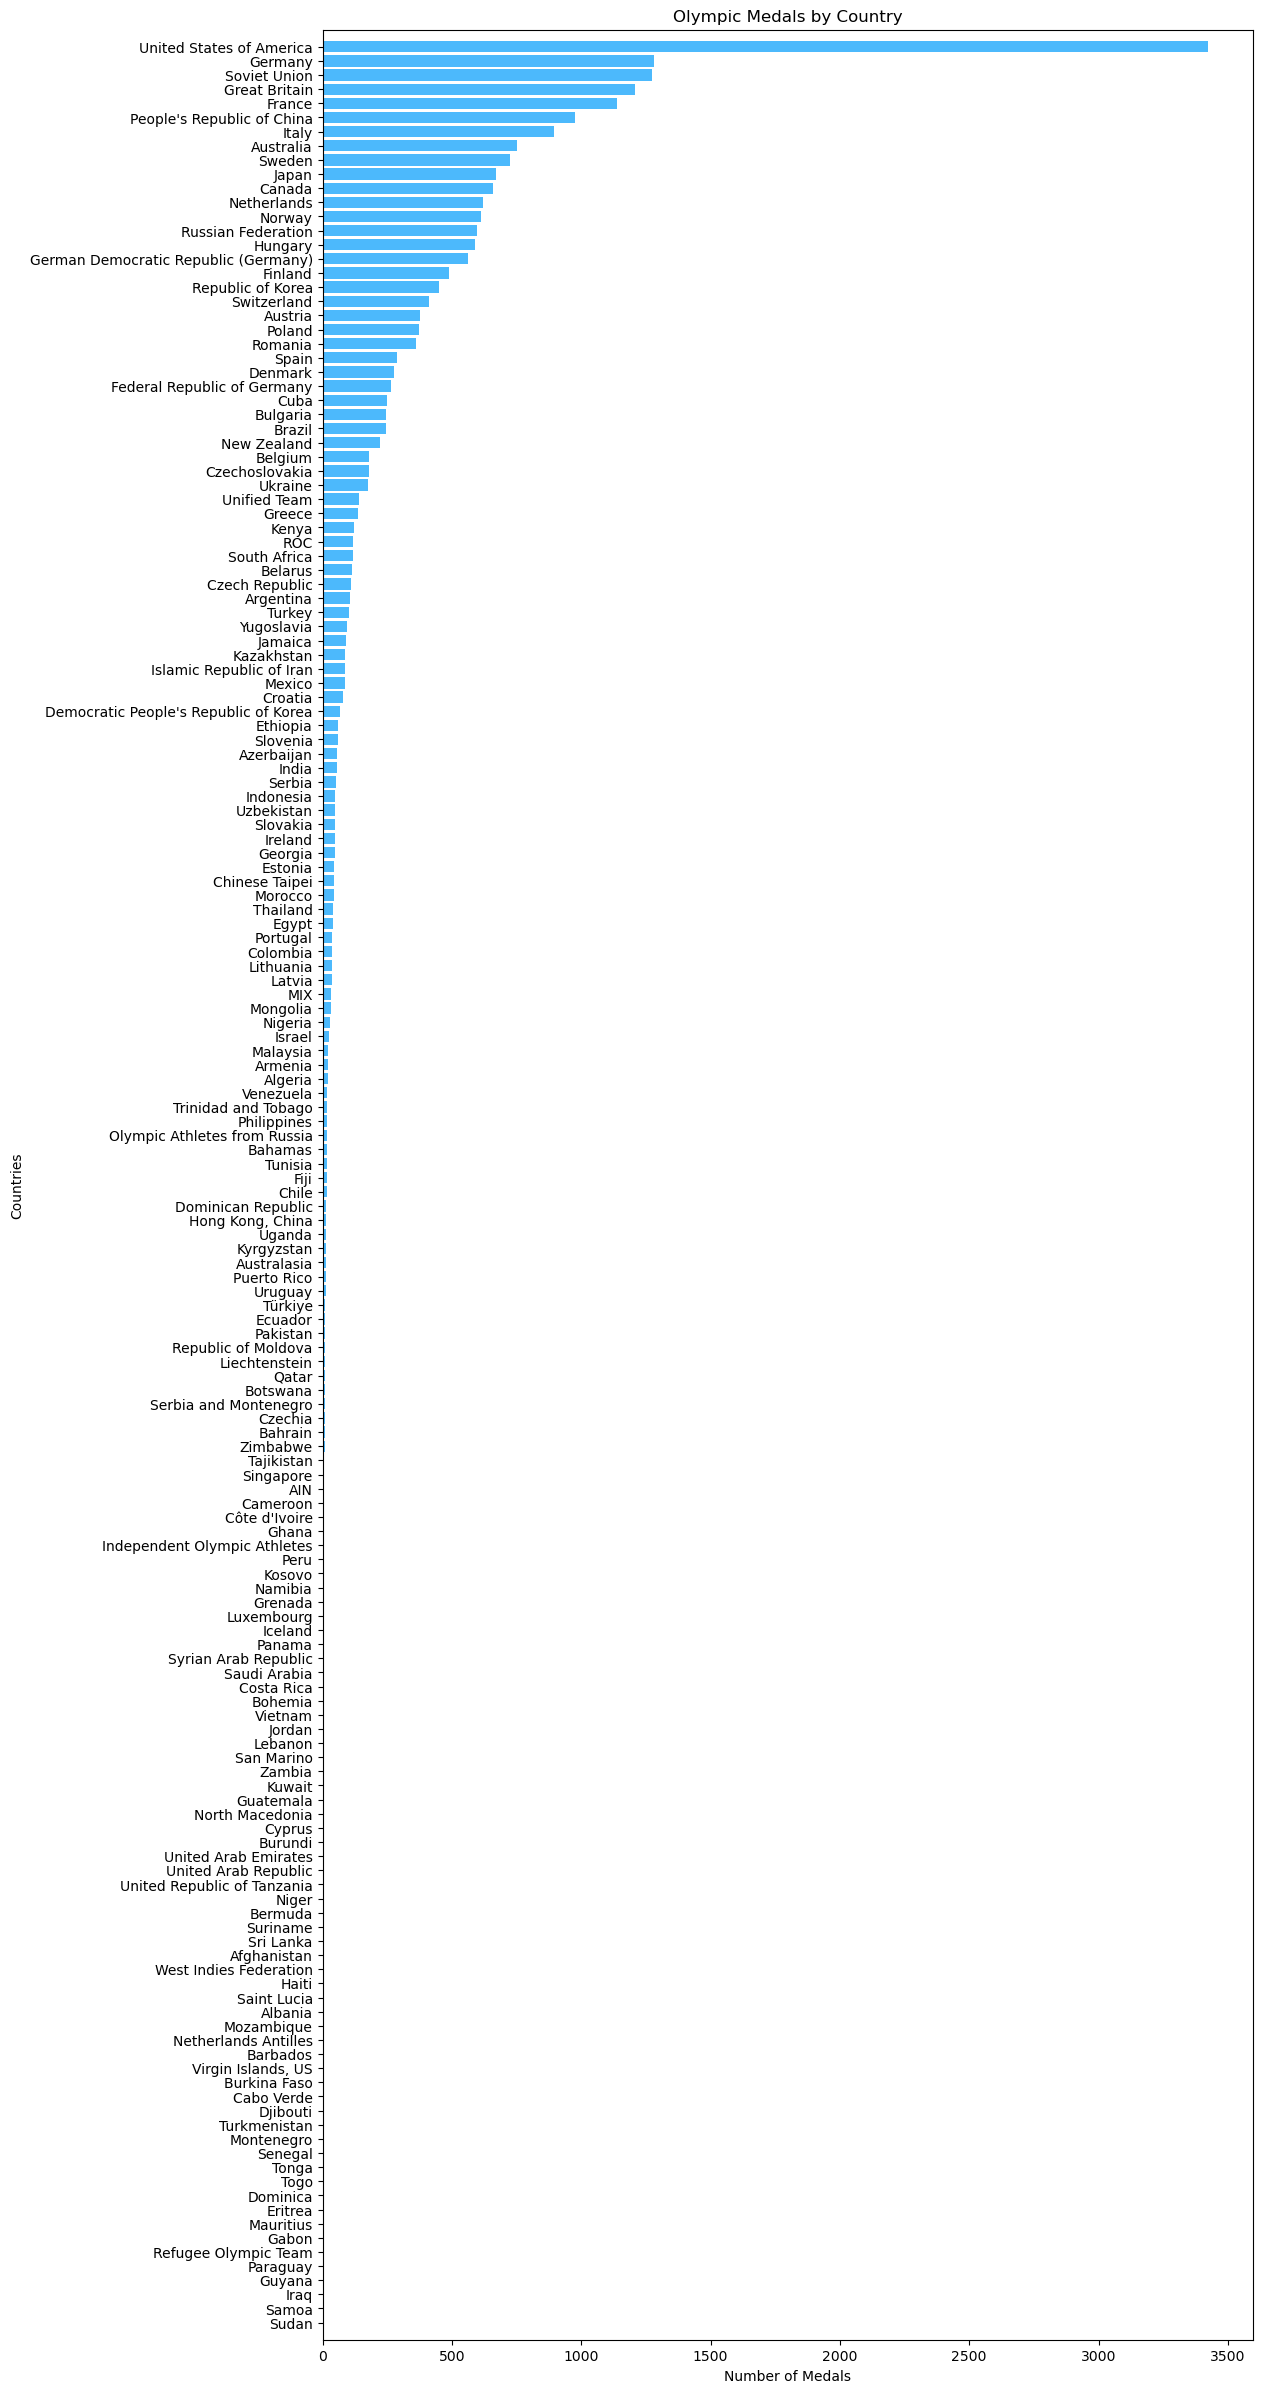

In [11]:
# Format the chart size
plt.figure(figsize=(12, 30))

# Format the information for our visual
plt.barh(medalsCountry.index, medalsCountry.values, color='#4cb9fc')
plt.title("Olympic Medals by Country")
plt.xlabel('Number of Medals')
plt.ylabel('Countries')
plt.margins(y=0.005)

# Invert the axis to show the highest medal count at the top
plt.gca().invert_yaxis()

plt.show()

## US Medals by Medal type

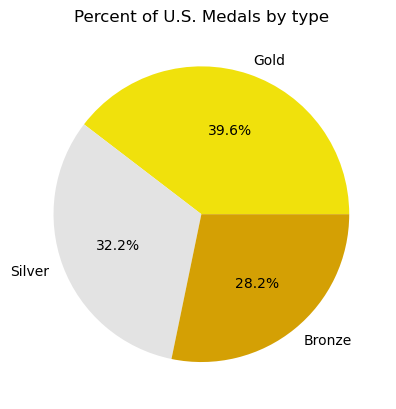

In [13]:
# Filter the main data file to only show the U.S. results.
usResults = resultsdf[resultsdf['Country'] == 'United States of America']

# Calculate each medal type for the U.S.
medalCounts = usResults['Medal'].value_counts()

# Set the colors for the slices
colors = ['#f0e10c', '#e3e3e3', '#d4a004']

# Create a Pie chart
plt.pie(medalCounts.values, labels=medalCounts.index, autopct='%1.1f%%', colors=colors)

# Add a title
plt.title('Percent of U.S. Medals by type')

plt.show()

## Line Chart

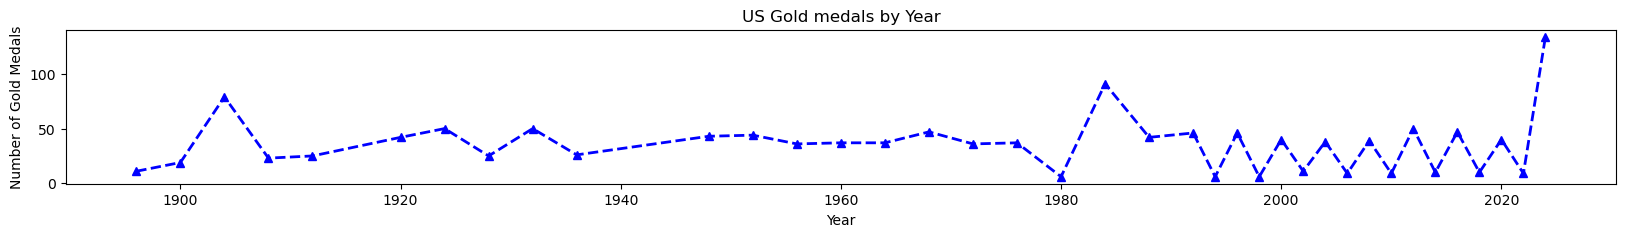

In [14]:
# U.S. Gold Medals by Year

# Ensure our data is filtered for U.S. and Gold Medals
usGold = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Gold')]

# Group the data
usGoldYr = usGold.groupby('Year')['Medal'].count()

# Chart the results
plt.figure(figsize=(20,2))

plt.plot(usGoldYr.index, usGoldYr.values, color='blue', linestyle='--', marker='^', linewidth=2, markersize=6)

plt.title('US Gold medals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')

plt.show()

C:\Users\rcook2\AppData\Local\Temp\2\ipykernel_19172\2403578454.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


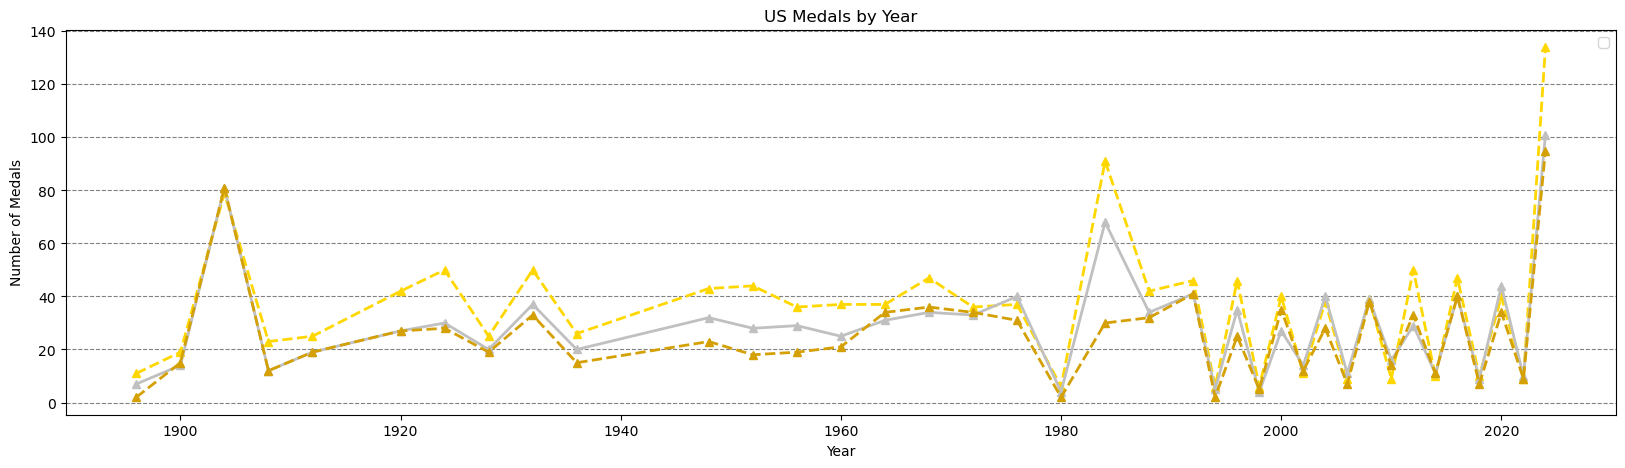

In [18]:
# Ensure our data is filtered for U.S. and Gold Medals
usGold = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Gold')]
usSilver = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Silver')]
usBronze = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Bronze')]

# Group the data
usGoldYr = usGold.groupby('Year')['Medal'].count()
usSilverYr = usSilver.groupby('Year')['Medal'].count()
usBronzeYr = usBronze.groupby('Year')['Medal'].count()

# Format our line chart
plt.figure(figsize=(20,5))

# Plot each dataframe group
plt.plot(usGoldYr.index, usGoldYr.values, color='gold', linestyle='--', marker='^', linewidth=2, markersize=6)
plt.plot(usSilverYr.index, usSilverYr.values, color='silver', linestyle='solid', marker='^', linewidth=2, markersize=6)
plt.plot(usBronzeYr.index, usBronzeYr.values, color='#d4a004', linestyle='dashed', marker='^', linewidth=2, markersize=6)

plt.title('US Medals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', color='gray')

plt.show()

# Seaborn

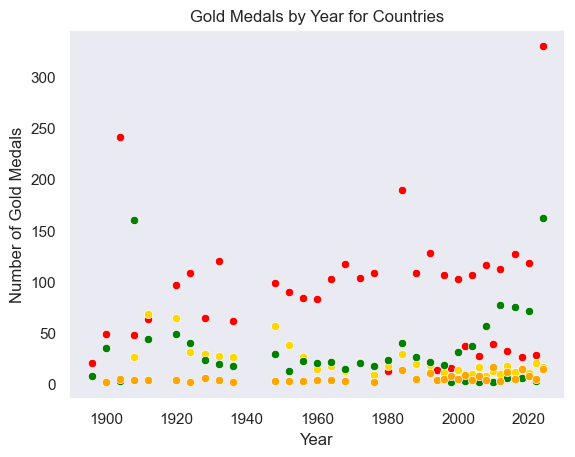

In [20]:
medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                       (resultsdf.Country == 'Sweden') |
                       (resultsdf.Country == 'Great Britain') |
                       (resultsdf.Country == 'Canada') &
                       (resultsdf.Medal == 'Gold')]


# Group the data for visualization
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')

# Group just by Year and Country
medalsByYr = medalsGold.groupby('Year')['Country'].count()

# Create a matrix to plot each medal in it's approprate location
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values = 'Gold Medals')

# Create our scatter plot
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'United States of America'], x='Year', y='Gold Medals', color='red')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Sweden'], x='Year', y='Gold Medals', color='Gold')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Great Britain'], x='Year', y='Gold Medals', color='Green')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Canada'], x='Year', y='Gold Medals', color='Orange')


# Style our plot
sns.set_style('darkgrid')

plt.title('Gold Medals by Year for Countries')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')

plt.show()

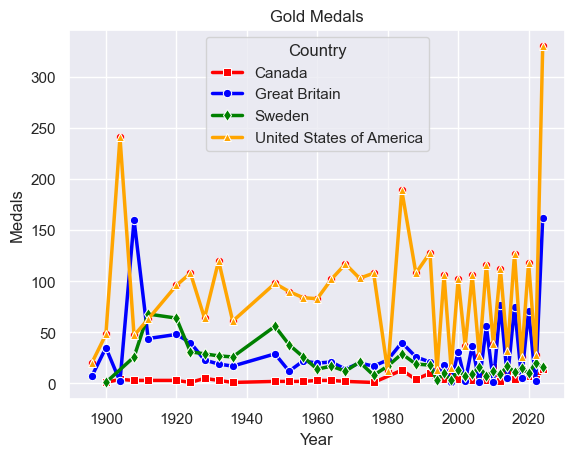

In [22]:
medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                       (resultsdf.Country == 'Sweden') |
                       (resultsdf.Country == 'Great Britain') |
                       (resultsdf.Country == 'Canada') &
                       (resultsdf.Medal == 'Gold')]


# Group the data for visualization
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')

# Group just by Year and Country
medalsByYr = medalsGold.groupby('Year')['Country'].count()

# Create a matrix to plot each medal in it's approprate location
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values = 'Gold Medals')

# Create our scatter plot
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'United States of America'], x='Year', y='Gold Medals', color='red')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Sweden'], x='Year', y='Gold Medals', color='Gold')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Great Britain'], x='Year', y='Gold Medals', color='Green')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Canada'], x='Year', y='Gold Medals', color='Orange')


# Style our plot
sns.set_style('darkgrid')

# Create a line plot with Seaborn
sns.lineplot(data=medalsPivot, dashes=False, linewidth=2.5, 
             palette=['red', 'blue', 'green', 'orange'], markers=['s', 'o', 'd', '^'])

plt.title('Gold Medals')
plt.xlabel('Year')
plt.ylabel('Medals')

plt.show()

## Example data sets from Seaborn

In [23]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [24]:
dfCars = sns.load_dataset('car_crashes')

dfCars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


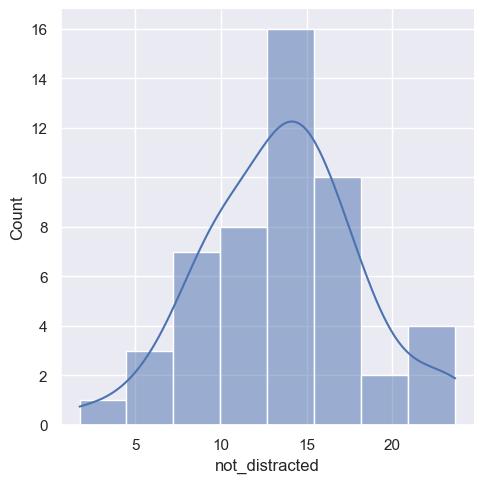

In [25]:
sns.displot(dfCars['not_distracted'], kde=True)

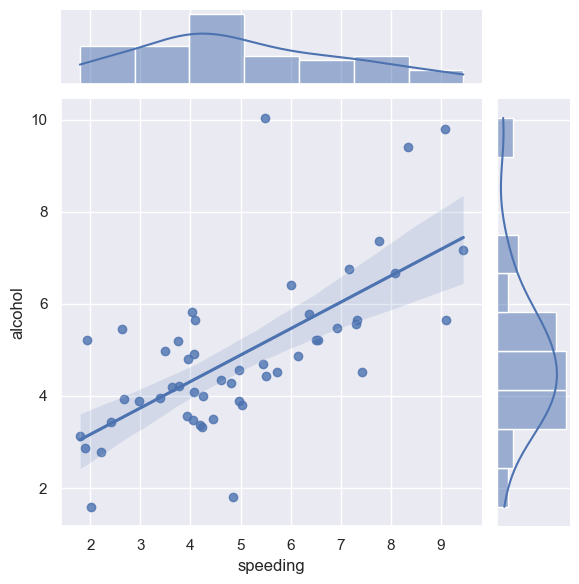

In [26]:
sns.jointplot(x='speeding', y='alcohol', data=dfCars, kind='reg')

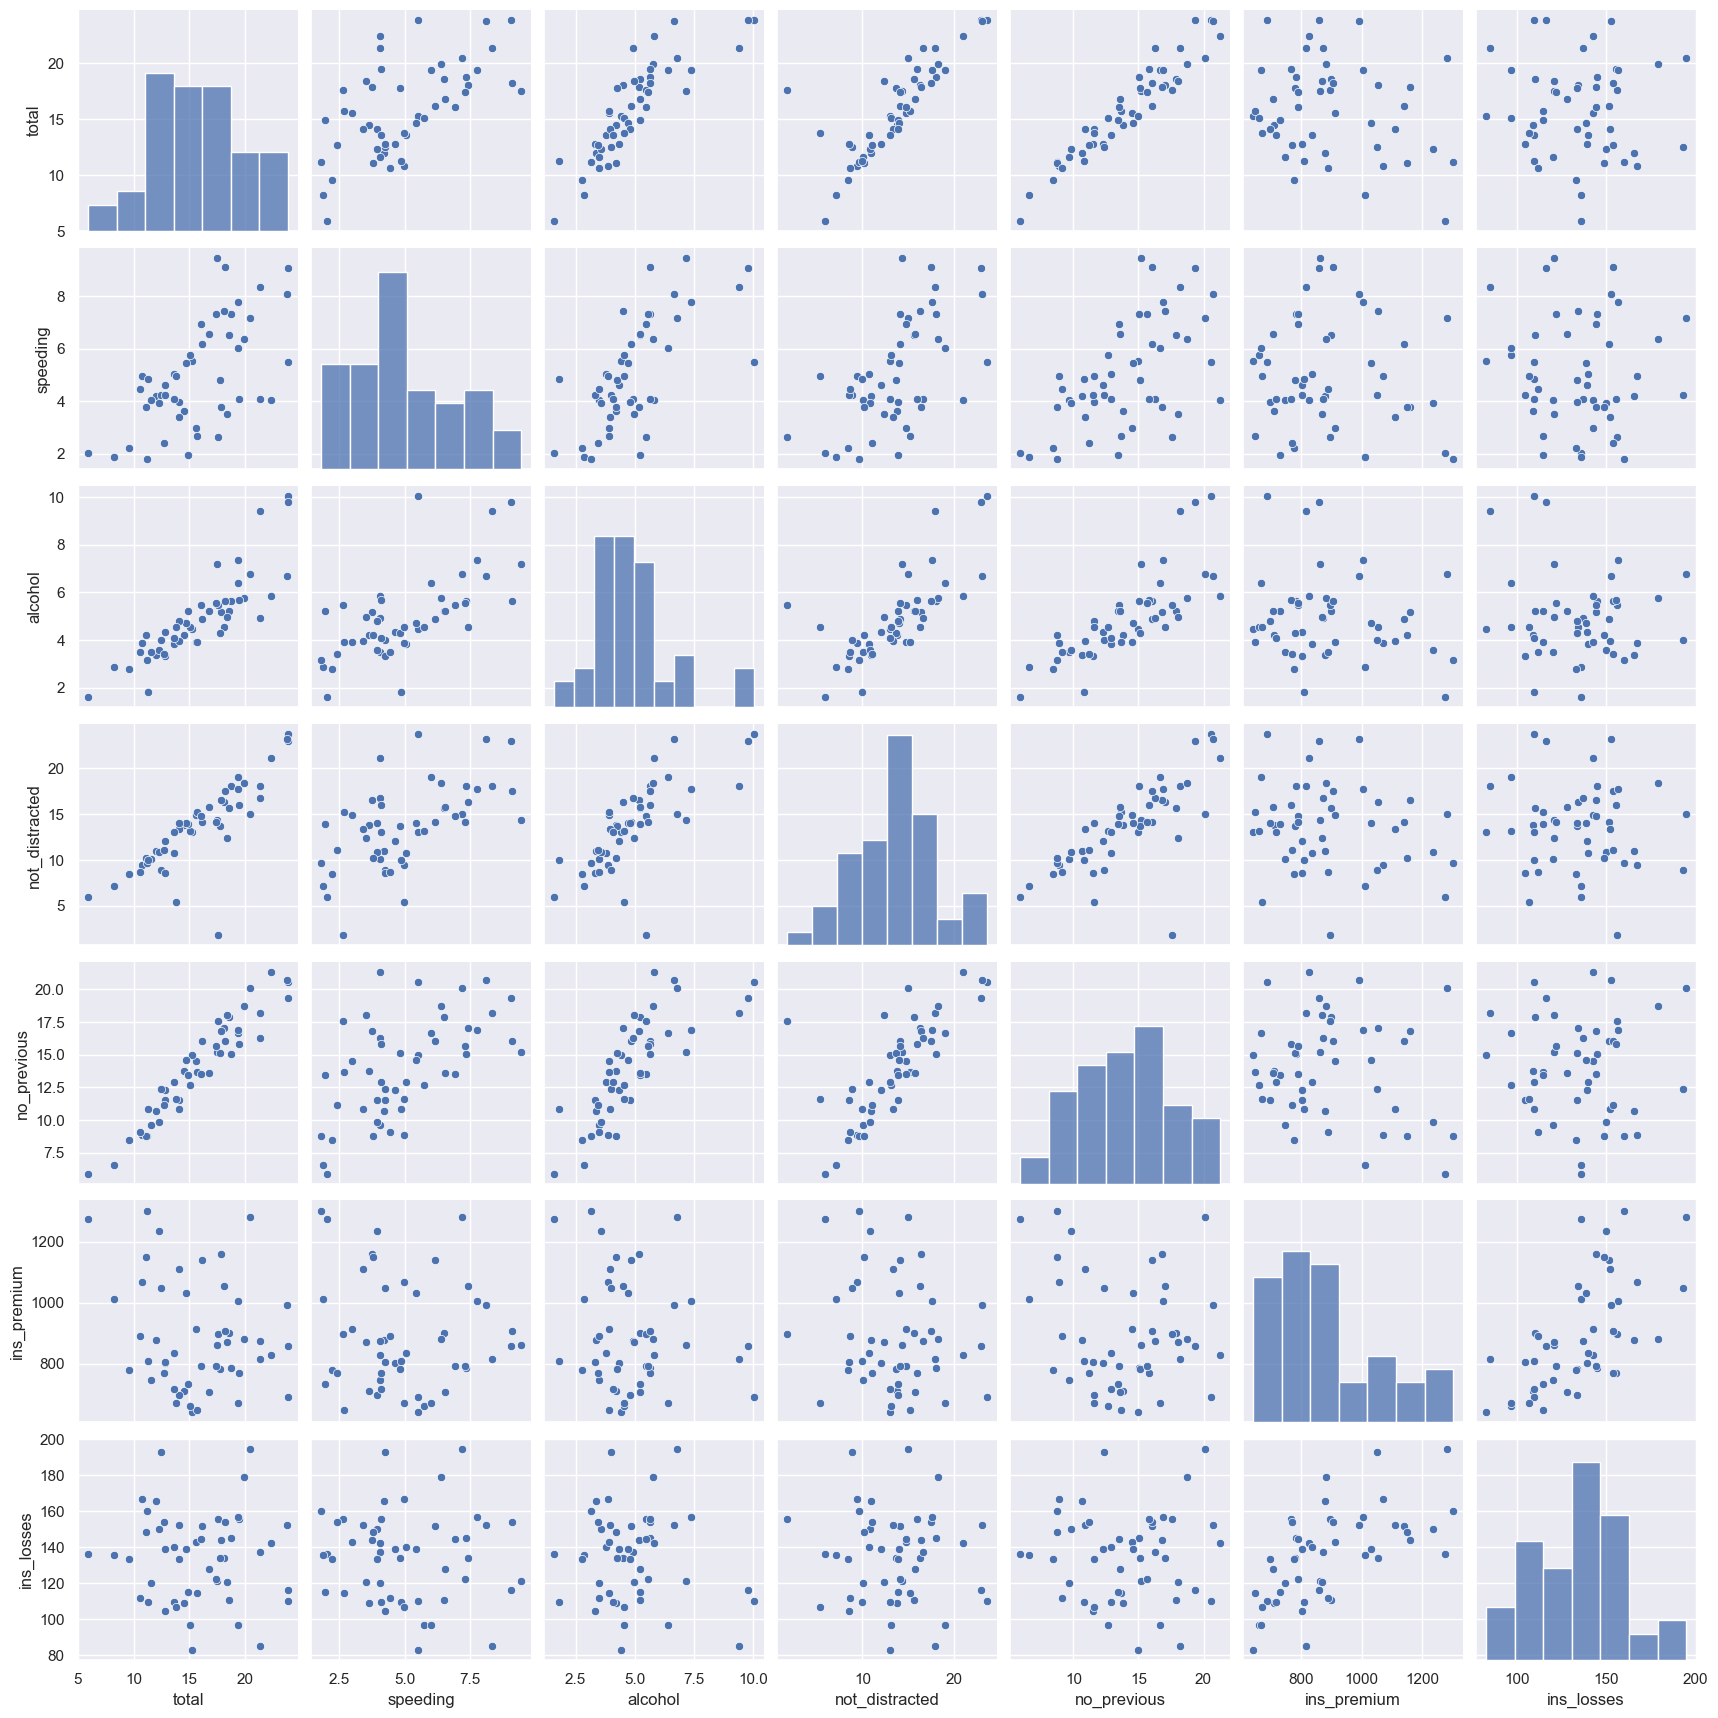

In [27]:
sns.pairplot(dfCars)

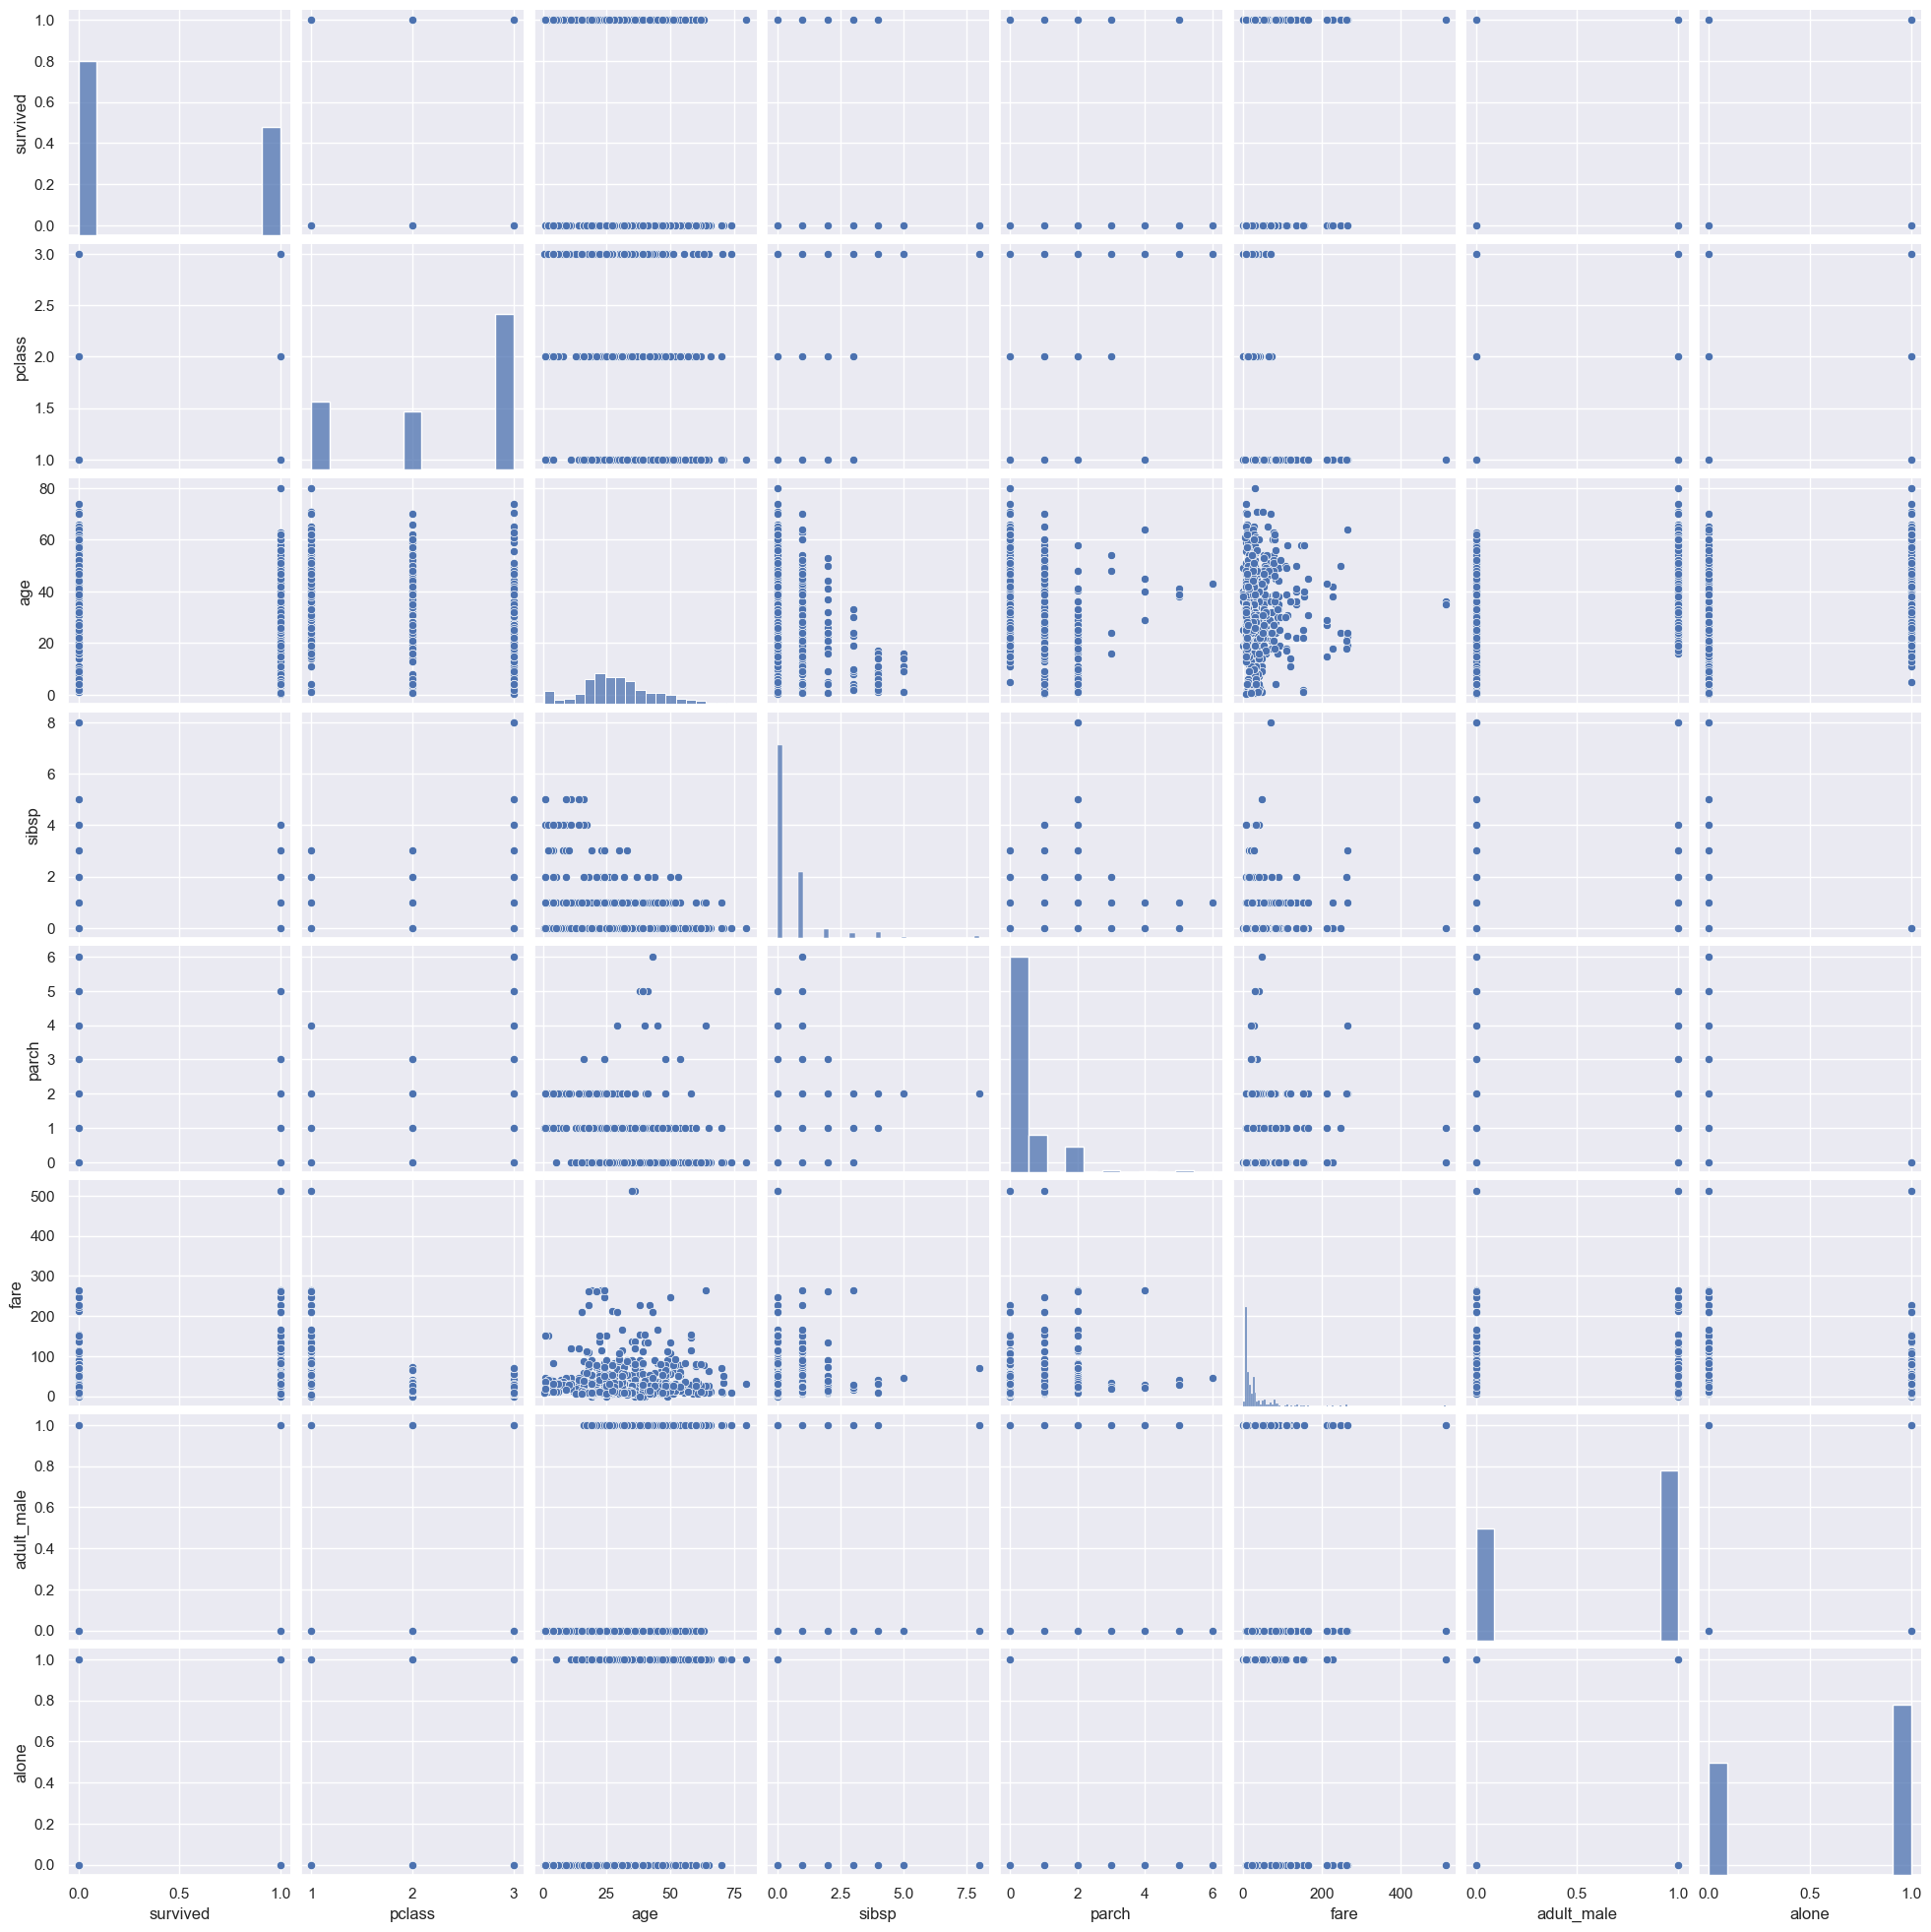

In [28]:
dfTitanic = sns.load_dataset('titanic')

sns.pairplot(dfTitanic)

In [29]:
brain = sns.load_dataset('brain_networks')

brain.head()

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418
